<a href="https://colab.research.google.com/github/ligthhouse/digits/blob/main/dataset_digits_dissect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Препарирую это прекрасный датасет

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
digits = datasets.load_digits()

In [4]:
X = digits.data
y = digits.target

In [5]:
X.shape, y.shape

((1797, 64), (1797,))

In [6]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [41]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [39]:
#функция отрисовка цифры
def plot_digit(digit_for_plot):
    y_series = pd.Series(y)
    digit_index = y_series[y_series.values==digit_for_plot].index[0]
    
    plt.gray()
    plt.matshow(digits.images[digit_index]);

<Figure size 432x288 with 0 Axes>

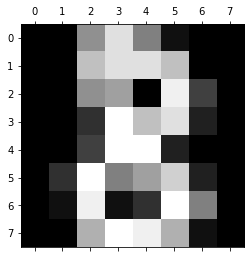

In [42]:
plot_digit(8)

Распределение классов

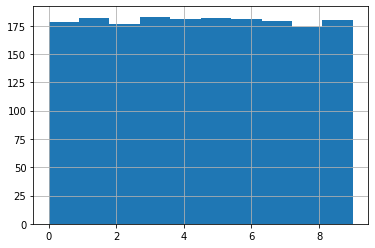

In [44]:
y_series.hist();

In [48]:
y_series.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

Как работает линейная регрессия?

In [59]:
import sklearn.linear_model as lin_model
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [88]:
def my_metric(regressor, grid, cv, scoring):
    model = regressor
    grid = grid
    scoring = scoring
    cv=cv
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Метрики с параметрами по умолчанию:', 'r2 =', metrics.r2_score(y_test, y_pred),
          'MAE =', metrics.mean_absolute_error(y_test, y_pred))
    
    
    gs = GridSearchCV(model, grid, cv=cv, scoring = scoring)
    gs.fit(X_train, y_train)
    y_pred_cv =gs.best_estimator_.predict(X_test)
    print('Лучший параметр alpha = ', gs.best_params_)
    print('Метрики с выбранным параметром:', 'r2 =', metrics.r2_score(y_test, y_pred_cv),
          'MAE =', metrics.mean_absolute_error(y_test, y_pred_cv))

In [89]:
grid ={'alpha': np.linspace(0.1, 1, 10)}

my_metric(lin_model.Lasso(), grid, 10, 'neg_mean_absolute_error')

Метрики с параметрами по умолчанию: r2 = 0.4606805135569151 MAE = 1.7122463180229708
Лучший параметр alpha =  {'alpha': 0.1}
Метрики с выбранным параметром: r2 = 0.563164306429282 MAE = 1.4900258496471326


In [90]:
grid ={'alpha': np.linspace(0.01, 0.2, 10)}

my_metric(lin_model.Lasso(), grid, 10, 'neg_mean_absolute_error')

Метрики с параметрами по умолчанию: r2 = 0.4606805135569151 MAE = 1.7122463180229708
Лучший параметр alpha =  {'alpha': 0.01}
Метрики с выбранным параметром: r2 = 0.5633666081835422 MAE = 1.4925137221150142
